<a href="https://colab.research.google.com/github/Federicoleyria/Proyecto-Date-Enginner-Trainee/blob/main/GRUPO_1_F_DATATHON_DESAF%C3%8DO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

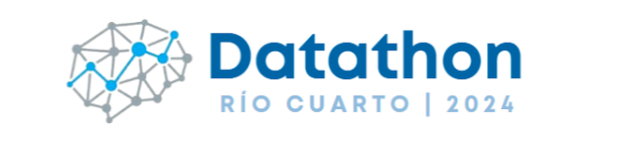
# **Datathon Social**

## DESAFIO 1. Exploración, Transformación y Carga de Datos

### **INTRODUCCIÓN**
Este desafío te invita a trabajar con la API de sendpulse, explorar su estructura de datos y visualizarla de manera efectiva. Luego, tendrás la oportunidad de ajustar los datos si es necesario y cargarlos en una base de datos, de preferencia utilizando SQLite. Como parte avanzada del desafío, se propone diseñar e implementar un proceso de carga incremental para manejar eficientemente los nuevos datos en la base de datos.

Nos mentendremos comunicado por discord para ayudarte con tus dudas, podes acceder desde el siguiente enlace [datathon](https://https://discord.com/channels/1228034030893793460/1228476410666946731)


### **INTRUCCIONES**
El equipo deberá presentar un archivo en google colab cumplimentado al menos el punto A.

**Puntos esenciales para la entrega**

A. Extracción de Datos:
1.   Conectarse a la API de sendpulse
2.   Extraer los datos por medio de la API
3.   Explorar los datos obtenidos
4.   Mostrarlos de manera comprensible

**Puntos opcionales**

B. Transformación y Carga en una Base de Datos :
1.   Adecuar los datos si lo considera necesario
2.   Crear la base de datos, tabla donde almacenar los datos
3.   Insertar los datos  en una base de datos.
Insertar los datos en una base de datos, dando preferencia a SQLite.

C. Carga Incremental:
1.   Crear proceso de carga incremental sobre la base de datos creada en el punto anterior.

**Recomendaciones:**
Cuanto más avances en los puntos propuestos, mayores serán tus posibilidades de ganar.
Se recomienda documentar el proceso y los pasos realizados utilizando Markdown en Google Colab para una mejor comprensión por parte de los evaluadores.

La creatividad y la eficiencia en la manipulación de datos serán valoradas positivamente.

¡Buena suerte y que comience el datathon! 🚀

## Datos necesarios para resolver el desafío

###Credenciales de la API

*   user_id = 'fc74fe057aced708a712493b4d235515'
*   secret = 'a49d9e8b51001d2249d6c9f83681b69d'

### URL para obtener el token de acceso
*   token_url = 'https://api.sendpulse.com/oauth/access_token'

### URL para la API del chatbot
*   https://api.sendpulse.com/telegram/chats
*   bot_id ='65746a856e9d24c086045e48'



# PROYECTO:  ALERT AR

# THE CRACK'S           

INTEGRANTES :    

Giulia Carbonari
                  
Marcelo Peralta

Federico Leyria

German Rodriguez



In [ ]:
#Librerias
import requests
import sqlite3
import json
import pandas as pd

In [ ]:
# Credenciales y URLs proporcionadas
user_id = 'fc74fe057aced708a712493b4d235515'
secret = 'a49d9e8b51001d2249d6c9f83681b69d'
token_url = 'https://api.sendpulse.com/oauth/access_token'
api_url = 'https://api.sendpulse.com/telegram/chats'
bot_id = '65746a856e9d24c086045e48'

# A. Extracción de Datos


##Conectarse a la API de sendpulse

In [ ]:
# Obtener el token de acceso
data = {
    'grant_type': 'client_credentials',
    'client_id': user_id,
    'client_secret': secret
}
response = requests.post(token_url, data=data)
token_info = response.json()
access_token = token_info['access_token']

In [ ]:
data

{'grant_type': 'client_credentials',
 'client_id': 'fc74fe057aced708a712493b4d235515',
 'client_secret': 'a49d9e8b51001d2249d6c9f83681b69d'}

In [ ]:
# Extraer los datos de la API del chatbot
headers = {
    'Authorization': f'Bearer {access_token}'
}
params = {
    #'bot_id': bot_id
}
response = requests.get(api_url, headers=headers, params=params)
chat_data = response.json()

In [ ]:
print(json.dumps(chat_data, indent=4))

{
    "success": true,
    "data": [
        {
            "inbox_last_message": {
                "contact_id": "66489eaaa7d5a9aa990967e4",
                "bot_id": "6640b1d869a72f980b0b7f03",
                "campaign_id": null,
                "sent_by": null,
                "direction": 1,
                "type": [],
                "status": 1,
                "channel": null,
                "campaign_message_number": null,
                "block_id": null,
                "send_block_id": null,
                "edited_at": null,
                "edited_by": null,
                "created_at": "2024-05-18T12:29:02+00:00",
                "id": "66489f0ec7c5be8ab702ecc5",
                "data": {
                    "text": "Test test",
                    "parse_mode": null,
                    "disable_web_page_preview": null,
                    "disable_notification": null,
                    "reply_to_message": null,
                    "reply_markup": null,
             

In [ ]:
chat_data['data']

[{'inbox_last_message': {'contact_id': '66489eaaa7d5a9aa990967e4',
   'bot_id': '6640b1d869a72f980b0b7f03',
   'campaign_id': None,
   'sent_by': None,
   'direction': 1,
   'type': [],
   'status': 1,
   'channel': None,
   'campaign_message_number': None,
   'block_id': None,
   'send_block_id': None,
   'edited_at': None,
   'edited_by': None,
   'created_at': '2024-05-18T12:29:02+00:00',
   'id': '66489f0ec7c5be8ab702ecc5',
   'data': {'text': 'Test test',
    'parse_mode': None,
    'disable_web_page_preview': None,
    'disable_notification': None,
    'reply_to_message': None,
    'reply_markup': None,
    'protect_content': None,
    'run_chain_id': None,
    'payload_contact_variables': None,
    'message_id': 418}},
  'inbox_unread': 10,
  'contact': {'bot_id': '6640b1d869a72f980b0b7f03',
   'status': 1,
   'operator': None,
   'type': 1,
   'last_activity_at': '2024-05-18T12:29:04+00:00',
   'referral_source': 'SERVICE_SHORTLINK',
   'quick_replies': [],
   'variables': {'Te

In [ ]:
from pandas import json_normalize

# Aplanar la estructura JSON
df = json_normalize(chat_data['data'])

# Mostrar el DataFrame
df

,inbox_unread,inbox_last_message.contact_id,inbox_last_message.bot_id,inbox_last_message.campaign_id,inbox_last_message.sent_by,inbox_last_message.direction,inbox_last_message.type,inbox_last_message.status,inbox_last_message.channel,inbox_last_message.campaign_message_number,...,inbox_last_message.data.audio_transcription.error_message,inbox_last_message.data.caption,inbox_last_message.data.token,inbox_last_message.data.date,contact.variables.NombreApellido,contact.variables.Email,contact.variables.Telefono,contact.variables.Ubicacion1,contact.variables.Sexo,contact.variables.Lugar
0,10,66489eaaa7d5a9aa990967e4,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,664560ca16dadba5db024de7,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,6640b1eeb88c76ed3c0e0107,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,6640d52f6b1b55227302553f,6640b1d869a72f980b0b7f03,None,None,1,[],1,None,None,...,NaN,NaN,7095113471:AAGoX1wqX2-2wNqEL40pS9VfKUKI52xsdhQ,1.715553e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,0,65748d628d16bbfb2f0e841d,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,6834597125:AAH5FTG_0KNpHLLMPURxyujzS6PfidG5_YI,1.712510e+09,NombrePersona1,correofalso1@gmail.com,2.334457e+07,"https://maps.google.com/?q=-34.512966,-58.494318",Mujer 🚺,Dentro de la Escuela
5,0,65cbda14147383e32b06a7a8,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NombrePersona2,correofalso2@gmail.com,3.515573e+09,NaN,Fem,NaN
6,0,65e9e8a91cda8a594806e561,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hombre 🚹,NaN
7,0,65746a8f8d16bbfb2f0e797c,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,Leo Lopez,leonardolopez71@hotmail.com,4.444000e+03,"https://maps.google.com/?q=-34.512955,-58.494296",Otro,Fuera de la Escuela
8,0,65b53f7e6fa50eefce088772,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,Argento Pepe,pepe@argento.com,3.513524e+08,"https://maps.google.com/?q=-31.403782,-64.200395",Masculino,Fuera de la Escuela
9,0,658476de62e82fcac708e1e6,65746a856e9d24c086045e48,None,None,1,[],1,None,None,...,NaN,NaN,NaN,NaN,NaN,s.reyna@sendpulse.com,1.234568e+09,"https://maps.google.com/?q=20.75326,-103.413301",Mujer 🚺,Otro lugar


##Extraer datos

#Preprocesamiento

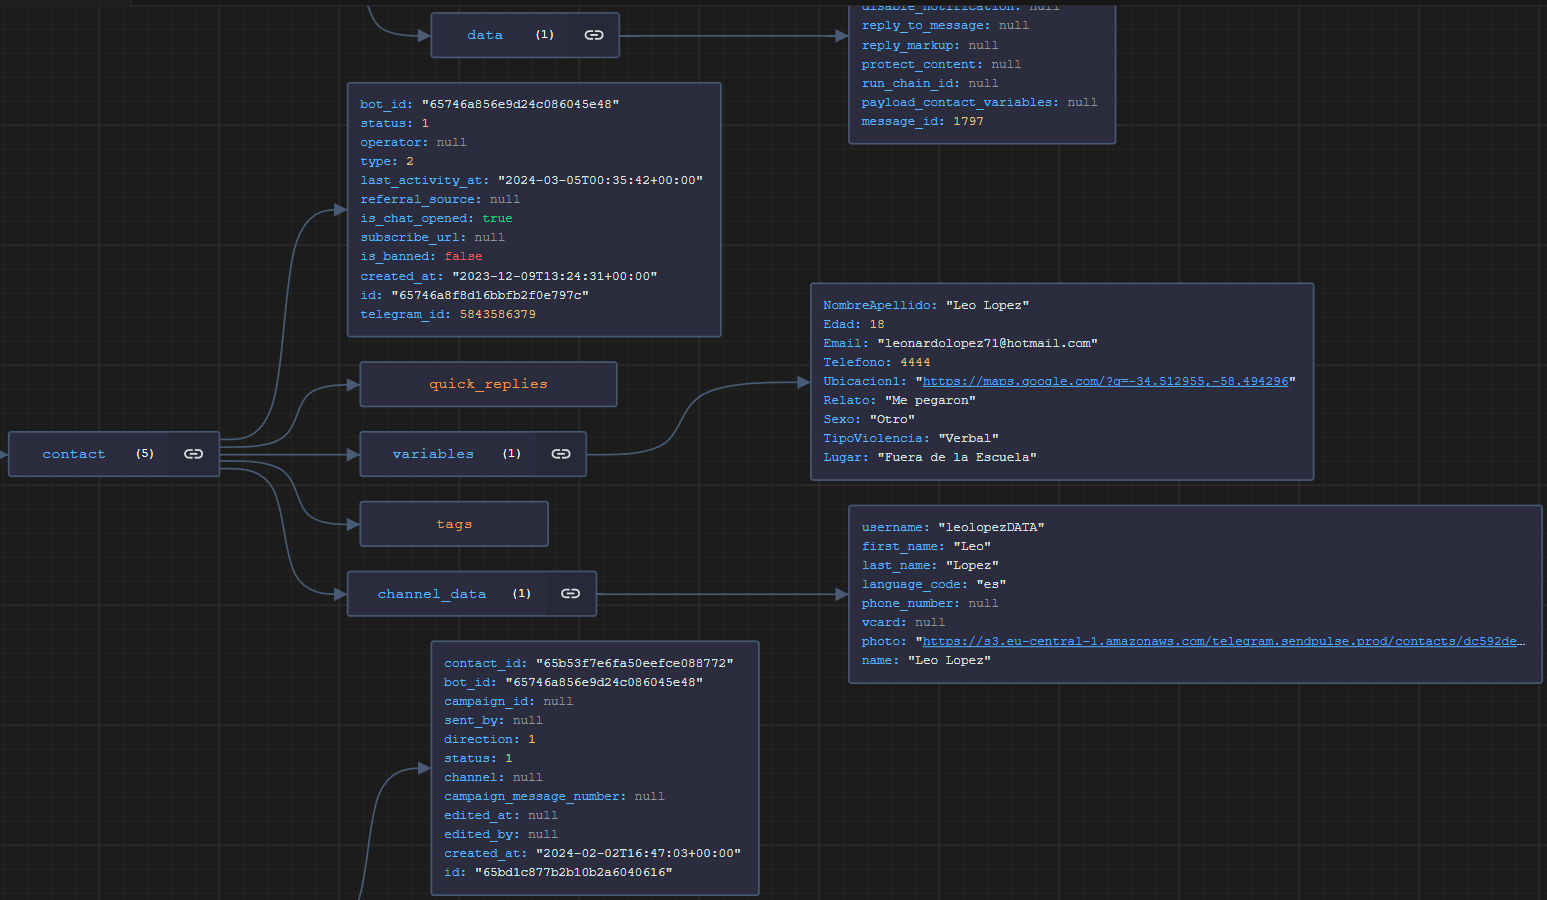

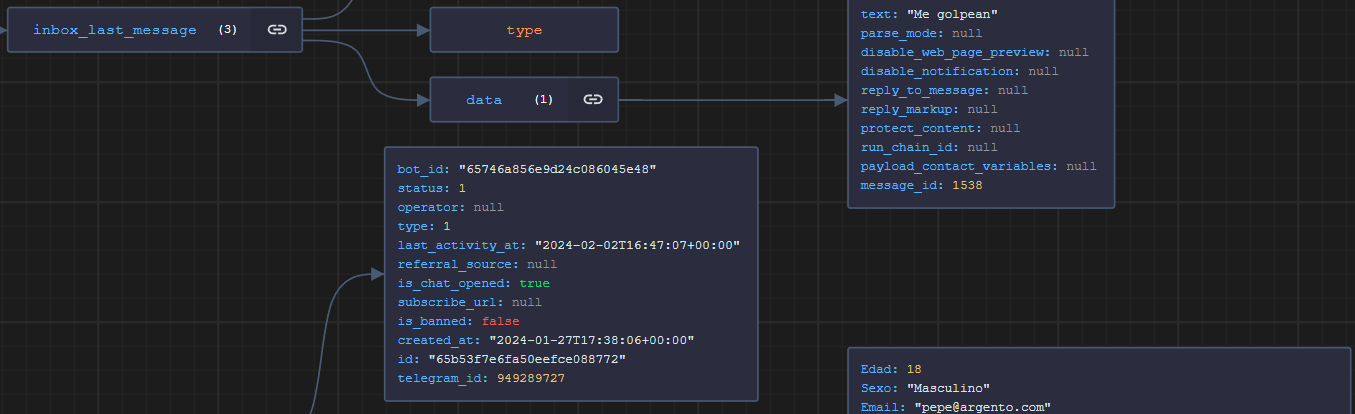

In [ ]:
data = chat_data['data']
filtered_data = [
    {
        'inbox_last_message': entry['inbox_last_message'],
        'contact': entry['contact']
    }
    for entry in data
]

filtered_data
# Convertir filtered_data en un DataFrame de pandas
df = pd.DataFrame(filtered_data)

# Dividir los diccionarios en columnas adicionales
inbox_last_message_cols = pd.json_normalize(df['inbox_last_message'])
contact_cols = pd.json_normalize(df['contact'])

# Unir las columnas adicionales al DataFrame original
df = pd.concat([df, inbox_last_message_cols, contact_cols], axis=1)

# Eliminar las columnas originales
df.drop(['inbox_last_message', 'contact'], axis=1, inplace=True)
df = df.dropna(axis=1, how='all')

In [ ]:
# Convertir la columna 'data.date' a formato de fecha
df['data.date'] = pd.to_datetime(df['data.date'], unit='s')  # suponiendo que 'data.date' está en formato UNIX timestamp

# Rellenar los valores faltantes en 'variables.Sexo'
df['variables.Sexo'].fillna(df['variables.Genero'], inplace=True)

# Rellenar los valores faltantes en 'variables.Telefono' con los valores de 'variables.TelefonoIngresado'
df['variables.Telefono'].fillna(df['variables.TelefonoIngresado'], inplace=True)

df['variables.Ubicacion1'].fillna(df['variables.UbicacionGPS'], inplace=True)
df['variables.Email'].fillna(df['variables.Mail'], inplace=True)

# Convertir la columna 'variables.Telefono' a formato de número de teléfono
df['variables.Telefono'] = df['variables.Telefono'].astype(str).str.replace(r'(\d{2})(\d{4})(\d{4})', r'(\1) \2-\3')  # Formatear a "(XX) XXXX-XXXX"

df['variables.Edad'].fillna(0, inplace=True)
# Convertir la columna 'variables.Edad' a tipo entero
df['variables.Edad'] = df['variables.Edad'].astype(int)
print(df.columns)

Index(['contact_id', 'bot_id', 'direction', 'type', 'status', 'created_at',
       'id', 'data.text', 'data.message_id', 'data.voice.mime_type',
       'data.voice.file_id', 'data.voice.file_size',
       'data.voice.file_unique_id', 'data.voice.duration',
       'data.audio_transcription.text', 'data.token', 'data.date', 'bot_id',
       'status', 'type', 'last_activity_at', 'referral_source',
       'quick_replies', 'tags', 'is_chat_opened', 'is_banned', 'created_at',
       'id', 'telegram_id', 'variables.TestigoVictima',
       'variables.TipoDenuncia', 'variables.Escuela', 'variables.Ciudad',
       'variables.Curso', 'variables.Turno', 'variables.LugarEscuela',
       'variables.TipoViolencia', 'variables.Relato', 'channel_data.username',
       'channel_data.first_name', 'channel_data.last_name',
       'channel_data.language_code', 'channel_data.photo', 'channel_data.name',
       'variables.NombreApellidoIngresado', 'variables.Edad',
       'variables.Genero', 'variables.Mail'

In [ ]:
# df_final = df[['data.text', 'data.audio_transcription.text', 'last_activity_at',
#        'telegram_id',  'channel_data.photo',
#        'channel_data.name', 'variables.Edad', 'variables.Email',
#        'variables.Telefono', 'variables.Ubicacion1', 'variables.Relato',
#        'variables.Sexo', 'variables.TipoViolencia', 'variables.Lugar','variables.TestigoVictima','variables.Escuela', 'variables.Ciudad', 'variables.Curso',
#                'variables.Turno', 'variables.LugarEscuela']]

df_final = df[['variables.TestigoVictima', 'channel_data.name', 'channel_data.photo', 'telegram_id', 'created_at', 'last_activity_at',
 'variables.TestigoVictima', 'variables.TipoDenuncia', 'variables.TipoViolencia',
    'variables.Relato', 'data.audio_transcription.text', 'variables.Escuela',	'variables.Ciudad',
'variables.Lugar']]


df_final

,variables.TestigoVictima,channel_data.name,channel_data.photo,telegram_id,created_at,created_at,last_activity_at,variables.TestigoVictima,variables.TipoDenuncia,variables.TipoViolencia,variables.Relato,data.audio_transcription.text,variables.Escuela,variables.Ciudad,variables.Lugar
0,Testigo 🙋,Alejo,https://s3.eu-central-1.amazonaws.com/telegram...,1679031087,2024-05-18T12:29:02+00:00,2024-05-18T12:27:22+00:00,2024-05-18T12:29:04+00:00,Testigo 🙋,Anónima 🙊,Fisica,Test test,NaN,Instituto Test,CABA,NaN
1,NaN,Marco,None,6069402026,2024-05-16T01:26:34+00:00,2024-05-16T01:26:34+00:00,2024-05-16T01:26:34+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Víctima 😭,Leo Lopez,https://s3.eu-central-1.amazonaws.com/telegram...,5843586379,2024-05-13T05:18:38+00:00,2024-05-12T12:11:26+00:00,2024-05-13T05:18:45+00:00,Víctima 😭,Anónima 🙊,Fisica,Me pegaron,NaN,Ipet 318,Berrotaran,NaN
3,Testigo 🙋,Rosa Pereyra,None,6563683964,2024-05-12T22:31:53+00:00,2024-05-12T14:41:51+00:00,2024-05-12T22:31:53+00:00,Testigo 🙋,NaN,Verbal,me dijeron negrita,Me dijeron gordita,Nacional,BS AS,NaN
4,NaN,Rosa Pereyra,None,6563683964,2024-04-07T17:09:12+00:00,2023-12-09T15:53:06+00:00,2024-04-07T17:09:12+00:00,NaN,NaN,Verbal,Se ríen de mí porque soy negrita.,Un compañero en el colegio me pelea.,NaN,NaN,Dentro de la Escuela
5,NaN,Mir,None,1806570969,2024-03-15T13:54:27+00:00,2024-02-13T21:07:32+00:00,2024-03-15T13:54:27+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Agustín,https://s3.eu-central-1.amazonaws.com/telegram...,187829670,2024-03-07T16:18:01+00:00,2024-03-07T16:17:45+00:00,2024-03-07T16:18:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Leo Lopez,https://s3.eu-central-1.amazonaws.com/telegram...,5843586379,2024-03-05T00:35:42+00:00,2023-12-09T13:24:31+00:00,2024-03-05T00:35:42+00:00,NaN,NaN,Verbal,Me pegaron,NaN,NaN,NaN,Fuera de la Escuela
8,NaN,Vicente Iaconetti,None,949289727,2024-02-02T16:47:03+00:00,2024-01-27T17:38:06+00:00,2024-02-02T16:47:07+00:00,NaN,NaN,Me golpearon en la calle,Me golpean,NaN,NaN,NaN,Fuera de la Escuela
9,NaN,Rebeca Reyna,https://s3.eu-central-1.amazonaws.com/telegram...,5354356683,2023-12-21T17:34:35+00:00,2023-12-21T17:33:18+00:00,2023-12-21T17:34:35+00:00,NaN,NaN,Otra,NaN,NaN,NaN,NaN,Otro lugar


#DIAGRAMA ENTIDAD RELACION

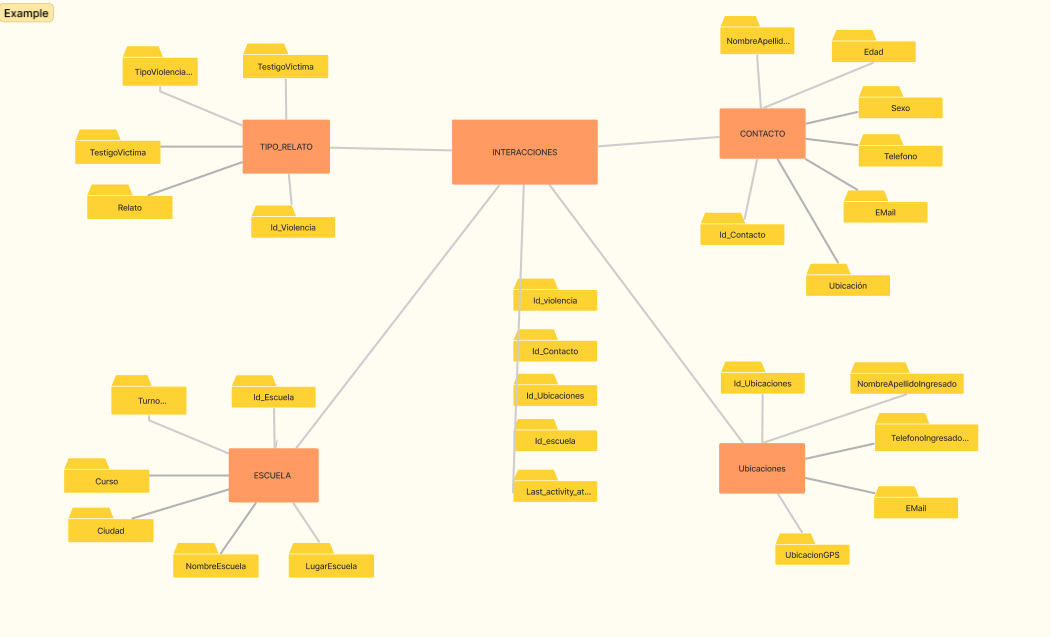

In [ ]:

# Conectar a la base de datos SQLite y crear la tabla si no existe
conn = sqlite3.connect('sendpulse_contacts.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS datos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    data TEXT,
    audio_transcription_text TEXT,
    last_activity TEXT,
    telegram TEXT,
    channel_data_photo TEXT,
    channel_data_name TEXT,
    variables_Edad INTEGER,
    variables_Email TEXT,
    variables_Telefono TEXT,
    variables_Ubicacion1 TEXT,
    variables_Relato TEXT,
    variables_Sexo TEXT,
    variables_TipoViolencia TEXT,
    variables_Lugar TEXT,
    variables_TestigoVictima TEXT,
    variables_Escuela TEXT,
    variables_Ciudad TEXT,
    variables_Curso TEXT,
    variables_Turno TEXT,
    variables_LugarEscuela TEXT
    '''
);

# Insertar los datos en la tabla
for index, row in df_final.iterrows():
    cursor.execute('''
    INSERT OR REPLACE INTO datos (
        variables_TestigoVictima, channel_data_name, channel_data_photo, telegram_id, created_at, last_activity_at,
        variables_TipoDenuncia, variables_TipoViolencia, variables_Relato, data_audio_transcription_text,
        variables_Escuela, variables_Ciudad, variables_Lugar
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['variables.TestigoVictima'], row['channel_data.name'], row['channel_data.photo'], row['telegram_id'],
        row['created_at'], row['last_activity_at'], row['variables.TipoDenuncia'], row['variables.TipoViolencia'],
        row['variables.Relato'], row['data.audio_transcription.text'], row['variables.Escuela'], row['variables.Ciudad'],
        row['variables.Lugar']
    ))

# Guardar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Datos almacenados en la base de datos SQLite con éxito.")

In [ ]:
#Explorar la BBDD
cursor.execute ("SELECT name from sqlite_master WHERE type='table';")
print(cursor.fetchall())

In [ ]:
contacts = 'select * from contacts'
cursor.execute(contacts)
print(cursor.fetchall())

In [ ]:
users = pd.read_sql_query(contacts, conn)
users

In [ ]:
#Contexto de la interacción
df[['variables.TestigoVictima', 'variables.TipoDenuncia', 'variables.TipoViolencia', 'variables.Relato']]

,variables.TestigoVictima,variables.TipoDenuncia,variables.TipoViolencia,variables.Relato
0,Testigo 🙋,Anónima 🙊,Fisica,Test test
1,NaN,NaN,NaN,NaN
2,Víctima 😭,Anónima 🙊,Fisica,Me pegaron
3,Testigo 🙋,NaN,Verbal,me dijeron negrita
4,NaN,NaN,Verbal,Se ríen de mí porque soy negrita.
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,Verbal,Me pegaron
8,NaN,NaN,Me golpearon en la calle,Me golpean
9,NaN,NaN,Otra,NaN


In [ ]:
#Registro de interacciones
df[['direction', 'type', 'created_at', 'last_activity_at']]

,direction,type,type,created_at,created_at,last_activity_at
0,1,[],1,2024-05-18T12:29:02+00:00,2024-05-18T12:27:22+00:00,2024-05-18T12:29:04+00:00
1,1,[],1,2024-05-16T01:26:34+00:00,2024-05-16T01:26:34+00:00,2024-05-16T01:26:34+00:00
2,1,[],2,2024-05-13T05:18:38+00:00,2024-05-12T12:11:26+00:00,2024-05-13T05:18:45+00:00
3,1,[],1,2024-05-12T22:31:53+00:00,2024-05-12T14:41:51+00:00,2024-05-12T22:31:53+00:00
4,1,[],1,2024-04-07T17:09:12+00:00,2023-12-09T15:53:06+00:00,2024-04-07T17:09:12+00:00
5,1,[],1,2024-03-15T13:54:27+00:00,2024-02-13T21:07:32+00:00,2024-03-15T13:54:27+00:00
6,1,[],1,2024-03-07T16:18:01+00:00,2024-03-07T16:17:45+00:00,2024-03-07T16:18:01+00:00
7,1,[],2,2024-03-05T00:35:42+00:00,2023-12-09T13:24:31+00:00,2024-03-05T00:35:42+00:00
8,1,[],1,2024-02-02T16:47:03+00:00,2024-01-27T17:38:06+00:00,2024-02-02T16:47:07+00:00
9,1,[],1,2023-12-21T17:34:35+00:00,2023-12-21T17:33:18+00:00,2023-12-21T17:34:35+00:00


In [ ]:
#Datos demográficos del contacto
df[[ 'variables.NombreApellido', 'variables.Edad', 'variables.Genero', 'variables.Sexo', 'variables.Email', 'variables.Ubicacion1', 'variables.TelefonoIngresado','variables.UbicacionGPS']]

,variables.NombreApellido,variables.Edad,variables.Genero,variables.Sexo,variables.Email,variables.Ubicacion1,variables.TelefonoIngresado,variables.UbicacionGPS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,16.0,Hombre 🚹,NaN,NaN,NaN,+541148571435,"https://maps.google.com/?q=-34.512966,-58.494318"
3,NaN,14.0,Mujer 🚺,NaN,NaN,NaN,+3585248875,"https://maps.google.com/?q=-34.512977,-58.49434"
4,NombrePersona1,13.0,NaN,Mujer 🚺,correofalso1@gmail.com,"https://maps.google.com/?q=-34.512966,-58.494318",NaN,NaN
5,NombrePersona2,14.0,NaN,Fem,correofalso2@gmail.com,NaN,NaN,NaN
6,NaN,43.0,NaN,Hombre 🚹,NaN,NaN,NaN,NaN
7,Leo Lopez,18.0,NaN,Otro,leonardolopez71@hotmail.com,"https://maps.google.com/?q=-34.512955,-58.494296",NaN,NaN
8,Argento Pepe,18.0,NaN,Masculino,pepe@argento.com,"https://maps.google.com/?q=-31.403782,-64.200395",NaN,NaN
9,NaN,22.0,NaN,Mujer 🚺,s.reyna@sendpulse.com,"https://maps.google.com/?q=20.75326,-103.413301",NaN,NaN


In [ ]:
#Información de la escuela
df[[ 'variables.Escuela', 'variables.Ciudad', 'variables.Curso', 'variables.Turno', 'variables.LugarEscuela']]

,variables.Escuela,variables.Ciudad,variables.Curso,variables.Turno,variables.LugarEscuela
0,Instituto Test,CABA,5°,Mañana,Patio
1,NaN,NaN,NaN,NaN,NaN
2,Ipet 318,Berrotaran,3°,Noche,Patio
3,Nacional,BS AS,1°,Tarde,Comedor
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Información adicional de contacto:
df[['variables.Mail',  'variables.NombreApellidoIngresado']]

,variables.Mail,variables.NombreApellidoIngresado
0,NaN,NaN
1,NaN,NaN
2,esunejemplo@gmail.com,Ordoñez David
3,rosadelvallepereyra18@gmail.com,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


# MAPEO

In [ ]:
import folium
import pandas as pd

# Crear un mapa centrado en una ubicación predeterminada
mapa = folium.Map(location=[-34.603722, -58.381592], zoom_start=5)

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    # Obtener la ubicación de la columna 'variables.Ubicacion1'
    ubicacion = row['variables.Ubicacion1']

    # Verificar si la ubicación no es NaN
    if not pd.isna(ubicacion):
        # Dividir la cadena de ubicación en latitud y longitud
        lat, lon = map(float, ubicacion.split('=')[-1].split(','))

        # Crear el contenido del popup
        popup_content = f"""
        <b>Testigo/Víctima:</b> {row['variables.TestigoVictima']}<br>
        <b>Nombre:</b> {row['channel_data.name']}<br>
        <b>Foto:</b> <img src="{row['channel_data.photo']}" alt="Foto" width="100" height="100"><br>
        <b>Fecha de creación:</b> {row['created_at']}<br>
        <b>Última actividad:</b> {row['last_activity_at']}<br>
        <b>Tipo de denuncia:</b> {row['variables.TipoDenuncia']}<br>
        <b>Tipo de violencia:</b> {row['variables.TipoViolencia']}<br>
        <b>Relato:</b> {row['variables.Relato']}<br>
        <b>Texto transcrito:</b> {row['data.audio_transcription.text']}<br>
        <b>Escuela:</b> {row['variables.Escuela']}<br>
        <b>Ciudad:</b> {row['variables.Ciudad']}<br>
        <b>Lugar:</b> {row['variables.Lugar']}
        """

        # Agregar un marcador en el mapa con el contenido del popup
        folium.Marker(
            [lat, lon],
            popup=folium.Popup(popup_content, max_width=500)
        ).add_to(mapa)

# Mostrar el mapa
mapa